<p style="font-size: 30px; text-align: center;"> ML PROJECT - PART 1</p>

<p style="font-size: 27px; text-align: center;">Mexican Tourist Profiles</p>

<p style="font-size: 25px; text-align: center;">Team Members</p>

<p style="font-size: 22px; text-align: center;">Pranav Laddhad - IMT2022074&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Rishit Mane - IMT2022564&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Himanshu Khatri - IMT2022584</p>
<!-- <p style="font-size: 22px; text-align: center;">Pranav Laddhad - IMT2022074</p>
<p style="font-size: 22px; text-align: right;">Himanshu Khatri - IMT2022584</p> -->

<p style="font-size: 17px; ">This notebook shows the following steps : </p>

1. **Preprocessing on training data**
2. **Fitting models**
3. **Model Evaluation**
4. **Preprocessing on testing data**
5. **Making predictions**


In [1]:
# importing the libraries pandas and numpy
import numpy as np
import pandas as pd

Loading of given "train.csv" data in pandas dataframe "train_data"

In [2]:
train_data = pd.read_csv('train.csv')

<p style="font-size: 26px;"> PREPROCESSING ON TRAINING DATA</p>

In [3]:
#  to see a concise summary of our dataframe
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12654 entries, 0 to 12653
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   trip_ID                          12654 non-null  object 
 1   visitor_nation                   12424 non-null  object 
 2   age_bracket                      12646 non-null  object 
 3   travelling_with                  11917 non-null  object 
 4   female_count                     12652 non-null  float64
 5   male_count                       12650 non-null  float64
 6   key_activity                     12526 non-null  object 
 7   trip_purpose                     12654 non-null  object 
 8   first_time_visitor               12555 non-null  object 
 9   mainland_nights                  12654 non-null  int64  
 10  island_nights                    12654 non-null  int64  
 11  tour_arrangement                 12654 non-null  object 
 12  transport_package_

In [4]:
# to see the number of columns and the number of rows in our data frame
train_data.shape

(12654, 25)

<p style="font-size: 18px;"> DROPPING THE DUPLICATES</p>

In [5]:
# to drop the duplicates if any
train_data.drop_duplicates(inplace = True)
train_data.shape

(12654, 25)

<p style="font-size: 18px;"></p>

In [6]:
columns_to_drop = ['trip_ID', 'source_of_info', 'weather_at_arrival', 'special_requirements']

In [7]:
train_data.drop(columns=columns_to_drop, inplace=True)

In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12654 entries, 0 to 12653
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   visitor_nation                   12424 non-null  object 
 1   age_bracket                      12646 non-null  object 
 2   travelling_with                  11917 non-null  object 
 3   female_count                     12652 non-null  float64
 4   male_count                       12650 non-null  float64
 5   key_activity                     12526 non-null  object 
 6   trip_purpose                     12654 non-null  object 
 7   first_time_visitor               12555 non-null  object 
 8   mainland_nights                  12654 non-null  int64  
 9   island_nights                    12654 non-null  int64  
 10  tour_arrangement                 12654 non-null  object 
 11  transport_package_international  12507 non-null  object 
 12  package_accomodati

In [9]:
# Display the number of nulls in each column
null_counts = train_data.isnull().sum()
print(null_counts)

visitor_nation                      230
age_bracket                           8
travelling_with                     737
female_count                          2
male_count                            4
key_activity                        128
trip_purpose                          0
first_time_visitor                   99
mainland_nights                       0
island_nights                         0
tour_arrangement                      0
transport_package_international     147
package_accomodation                143
food_package                        171
transport_package_mx                  0
sightseeing_package                   0
guided_tour_package                   0
insurance_package                   236
days_before_booked                 1553
tour_length                         402
category                             34
dtype: int64


In [10]:
null_value_percentages = (train_data.isna().sum()/train_data.shape[0])*100
null_value_percentages

,0
visitor_nation,1.817607
age_bracket,0.063221
travelling_with,5.824245
female_count,0.015805
male_count,0.031611
key_activity,1.011538
trip_purpose,0.000000
first_time_visitor,0.782361
mainland_nights,0.000000
island_nights,0.000000


In [11]:
categorical_columns_raw = ['visitor_nation', 'age_bracket', 'travelling_with', 'key_activity',
               'first_time_visitor', 'transport_package_international', 'package_accomodation',
               'food_package', 'insurance_package']

In [12]:
# Filling the rows with NaN values with the mode of their respective columns
for column in categorical_columns_raw:
    mode_train = train_data[column].mode()[0]
    train_data[column].fillna(mode_train, inplace=True)

<ipython-input-12-709e8f81b006>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data[column].fillna(mode_train, inplace=True)


In [13]:
train_data[categorical_columns_raw].head(10)

,visitor_nation,age_bracket,travelling_with,key_activity,first_time_visitor,transport_package_international,package_accomodation,food_package,insurance_package
0,FRANCE,45-64,With Spouse and Children,Beach Tourism,Yes,No,No,No,No
1,KENYA,45-64,Alone,Conference Tourism,Yes,No,No,No,No
2,SOUTH AFRICA,25-44,With Other Friends/Relatives,Cultural Tourism,No,No,No,No,No
3,ITALY,25-44,With Spouse,Widlife Tourism,Yes,No,Yes,Yes,No
4,ITALY,25-44,With Spouse,Beach Tourism,Yes,Yes,Yes,Yes,No
5,ZIMBABWE,25-44,With Other Friends/Relatives,Wildlife Tourism,Yes,No,No,No,No
6,INDIA,25-44,With Spouse,Hunting Tourism,No,No,No,No,No
7,KENYA,45-64,Alone,Conference Tourism,No,No,No,No,No
8,AUSTRIA,18-24,With Spouse,Widlife Tourism,Yes,No,No,No,No
9,KENYA,25-44,Alone,Beach Tourism,No,No,No,No,No


In [14]:
'''The convert_ranges function is converting input values into numerical representations. If the value is missing (NaN), it is returning NaN.
For values containing a hyphen (-), which represent a range (e.g., "5-10"), it is splitting the string, calculating the average of the two numbers, and returning it.
If the value contains a plus sign (+), it is treating it as a single number (e.g., "20+"), removing the plus sign, and returning the number as a float.
For all other cases, it is directly converting the input to a float.'''

def convert_ranges(cell):
    if pd.isna(cell):
        return np.nan
    if '-' in str(cell):
        low, high = cell.split('-')
        return (float(low) + float(high)) / 2
    elif '+' in str(cell):
        return float(cell.replace('+', ''))
    else:
        return float(cell)

In [15]:
train_data['days_before_booked'] = train_data['days_before_booked'].apply(convert_ranges)
train_data['tour_length'] = train_data['tour_length'].apply(convert_ranges)

In [16]:
train_data[['days_before_booked', 'tour_length']]

,days_before_booked,tour_length
0,NaN,30.0
1,22.5,30.0
2,90.0,30.0
3,11.0,NaN
4,90.0,10.5
...,...,...
12649,NaN,30.0
12650,75.5,10.5
12651,90.0,3.5
12652,75.5,10.5


In [17]:
numerical_columns_raw = ['female_count', 'male_count', 'days_before_booked', 'tour_length']

In [18]:
# from scipy.stats import zscore

# # Loop through each numerical column
# for column in numerical_columns_raw:
#     # Calculate Z-scores
#     z_scores = zscore(train_data[column].dropna())  # Drop NA values for Z-score calculation

#     # Find indices where Z-score is above a threshold, e.g., 3
#     # outliers = train_data[(z_scores > 3) | (z_scores < -3)]
#     outliers = train_data[(z_scores > 5) | (z_scores < -5)]
#     print(f"Outliers in {column}:")
#     print(outliers[column].values)
#     print()

In [19]:
# import numpy as np
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt
# def calculate_outlier_percentage(df, column):
#     Q1 = df[column].quantile(0.25)
#     Q3 = df[column].quantile(0.75)
#     IQR = Q3 - Q1  # Interquartile range
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR
#     outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
#     outlier_percentage = (len(outliers) / len(df)) * 100  # Percentage of outliers
#     return outlier_percentage
# columns_to_analyze = ['female_count', 'male_count']
# outlier_info = {}
# for column in columns_to_analyze:
#     percentage = calculate_outlier_percentage(train_data, column)
#     outlier_info[column] = percentage
#     print(f'Outlier percentage in {column}: {percentage:.2f}%')
# fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)
# palette = sns.color_palette("coolwarm", len(columns_to_analyze))
# for i, column in enumerate(columns_to_analyze):
#     sns.boxplot(data=train_data, y=column, ax=axes[i], color=palette[i], width=0.5, fliersize=5, linewidth=1.2)
#     axes[i].set_title(f'{column.capitalize()} (Outliers: {outlier_info[column]:.2f}%)', fontsize=14)
#     axes[i].set_ylabel(f'{column.capitalize()}')
#     axes[i].grid(axis='y', linestyle='--', alpha=0.7)
# fig.suptitle("Box Plots of Female and Male Count with Outlier Percentages", fontsize=16)
# plt.tight_layout(rect=[0, 0, 1, 0.95])
# plt.show()


In [20]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# columns_to_plot = ['female_count', 'male_count']
# fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)
# palette = sns.color_palette("coolwarm", len(columns_to_plot))

# for i, column in enumerate(columns_to_plot):
#     sns.boxplot(data=train_data, y=column, ax=axes[i], color=palette[i], width=0.5, fliersize=5, linewidth=1.2)

#     axes[i].set_title(f'Box Plot of {column.capitalize()}', fontsize=14)
#     axes[i].set_ylabel(f'{column.capitalize()}')
#     axes[i].grid(axis='y', linestyle='--', alpha=0.7)

# fig.suptitle("Box Plots of Female and Male Count", fontsize=16)
# plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to fit main title

# plt.show()


In [21]:
# Here we are filling missing values in the specified numerical columns of train_data with the median value of each respective column and applying this operation across all columns in numerical_columns_raw.
for column in numerical_columns_raw:
    median_train = train_data[column].median()
    train_data[column].fillna(median_train, inplace=True)

<ipython-input-21-33b64e8b7e2f>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data[column].fillna(median_train, inplace=True)


In [22]:
train_data[numerical_columns_raw].head(10)

,female_count,male_count,days_before_booked,tour_length
0,1.0,2.0,75.5,30.0
1,1.0,0.0,22.5,30.0
2,2.0,0.0,90.0,30.0
3,1.0,1.0,11.0,10.5
4,1.0,1.0,90.0,10.5
5,0.0,2.0,75.5,10.5
6,1.0,1.0,90.0,30.0
7,0.0,1.0,90.0,10.5
8,1.0,1.0,75.5,10.5
9,0.0,1.0,75.5,3.5


In [23]:
'''We created a mapping of the frequency of each key activity using the value_counts() method and converted it into a dictionary.
This frequency was then mapped to a new feature, activity count, which indicates how often each activity occurs in the dataset.
Next, we calculated the average number of days before booking a trip for each age bracket and stored this information in the avg days before booked by age feature.
Similarly, we computed the average tour length for each key activity and stored it in avg tour length by activity. We also created a new feature, days per activity,
by dividing the tour length by the activity count (with an offset of 1 to avoid division by zero). This new feature represents the number of days spent per activity.
Finally, we returned the modified dataset after these transformations.'''

def feature_engineering(data):
    # data['total_companions'] = data['female_count'] + data['male_count']
    # data['island_to_mainland_ratio'] = data['island_nights'] / (data['mainland_nights'] + 1)  # Avoid division by zero
    # data['number_of_island_days'] = data['island_nights'] + data['mainland_nights']

    activity_count_map = data['key_activity'].value_counts().to_dict()
    data['activity_count'] = data['key_activity'].map(activity_count_map)

    # age_count_map = data['age_bracket'].value_counts().to_dict()
    # data['age_count'] = data['age_bracket'].map(age_count_map)

    # trip_count_map = data['trip_purpose'].value_counts().to_dict()
    # data['trip_count'] = data['trip_purpose'].map(trip_count_map)

    data['avg_days_before_booked_by_age'] = data.groupby('age_bracket')['days_before_booked'].transform('mean')

    # data['avg_tour_length_by_age'] = data.groupby('age_bracket')['tour_length'].transform('mean')
    data['avg_tour_length_by_activity'] = data.groupby('key_activity')['tour_length'].transform('mean')

    data['days_per_activity'] = data['tour_length'] / (data['activity_count'] + 1)  # Avoid divide by zero

    # data.drop(columns = ["female_count", "male_count"])
    # data.drop(columns = ["island_nights", "mainland_nights"])
    return data

In [24]:
train_data = feature_engineering(train_data)

In [25]:
train_data.dropna(subset=['category'], inplace=True)

In [26]:
categorical_columns = ['visitor_nation', 'age_bracket', 'travelling_with', 'key_activity',
                       'trip_purpose', 'first_time_visitor', 'tour_arrangement',
                       'transport_package_international', 'package_accomodation',
                       'food_package', 'transport_package_mx', 'sightseeing_package',
                       'guided_tour_package', 'insurance_package']

numerical_columns = ['female_count', 'male_count', 'mainland_nights', 'island_nights',
                     'days_before_booked', 'tour_length', 'activity_count','avg_days_before_booked_by_age','days_per_activity']



In [27]:
# # Outlier Detection and Handling Function

In [28]:

# def handle_outliers(data, numerical_columns):
#     for column in numerical_columns:
#         Q1 = data[column].quantile(0.25)
#         Q3 = data[column].quantile(0.75)
#         IQR = Q3 - Q1
#         lower_bound = Q1 - 1.5 * IQR
#         upper_bound = Q3 + 1.5 * IQR

#         # Option 1: Clipping outliers
#         data[column] = np.clip(data[column], lower_bound, upper_bound)

#         # Option 2: Impute outliers with median (uncomment to use)
#         # median = data[column].median()
#         # data[column] = data[column].apply(lambda x: median if x < lower_bound or x > upper_bound else x)

#     return data

# train_data = handle_outliers(train_data, numerical_columns)
# test_data = handle_outliers(test_data, numerical_columns)

In [29]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer

In [30]:
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE

In [31]:
# categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# categorical_transformer = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

Here we have ObjectToCategoryTransformer that converts object-type columns in the dataset to categorical data types. It inherits from BaseEstimator and TransformerMixin to integrate with scikit-learn's pipeline framework. The fit method is defined to return the transformer itself, while the transform method applies the conversion by iterating over the object-type columns and changing their data type to 'category'. The categorical_transformer is then defined as a pipeline (ImbPipeline) that first applies the ObjectToCategoryTransformer to convert object columns to categories, followed by one-hot encoding using OneHotEncoder with handle_unknown='ignore' to safely handle any unseen categories during transformation. The preprocessor is a ColumnTransformer that applies the appropriate transformations to both numerical and categorical columns: numerical columns are scaled using StandardScaler, and categorical columns are processed by the categorical_transformer

In [32]:
from sklearn.base import BaseEstimator, TransformerMixin

class ObjectToCategoryTransformer(BaseEstimator, TransformerMixin):
    def fit(self, train_data, y=None):
        return self

    def transform(self, train_data, y=None):
        # Convert object columns to category
        for col in train_data.select_dtypes(include='object').columns:
            train_data[col] = train_data[col].astype('category')
        return train_data


In [33]:
numerical_transformer = StandardScaler()


categorical_transformer = ImbPipeline(steps=[
    ('object_to_category', ObjectToCategoryTransformer()),  # Converts to category
    ('onehot', OneHotEncoder(handle_unknown='ignore'))      # One-hot encoding
])

In [34]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_columns),
        ('cat', categorical_transformer, categorical_columns)
    ])

In [35]:
# # Access the fitted OneHotEncoder
# ohe = preprocessor.named_transformers_['cat']  # 'cat' refers to the name we gave to categorical transformer

# # Get the category mappings for each categorical feature
# for col, categories in zip(categorical_columns, ohe.categories_):
#     print(f"Column '{col}' categories:        {categories}")


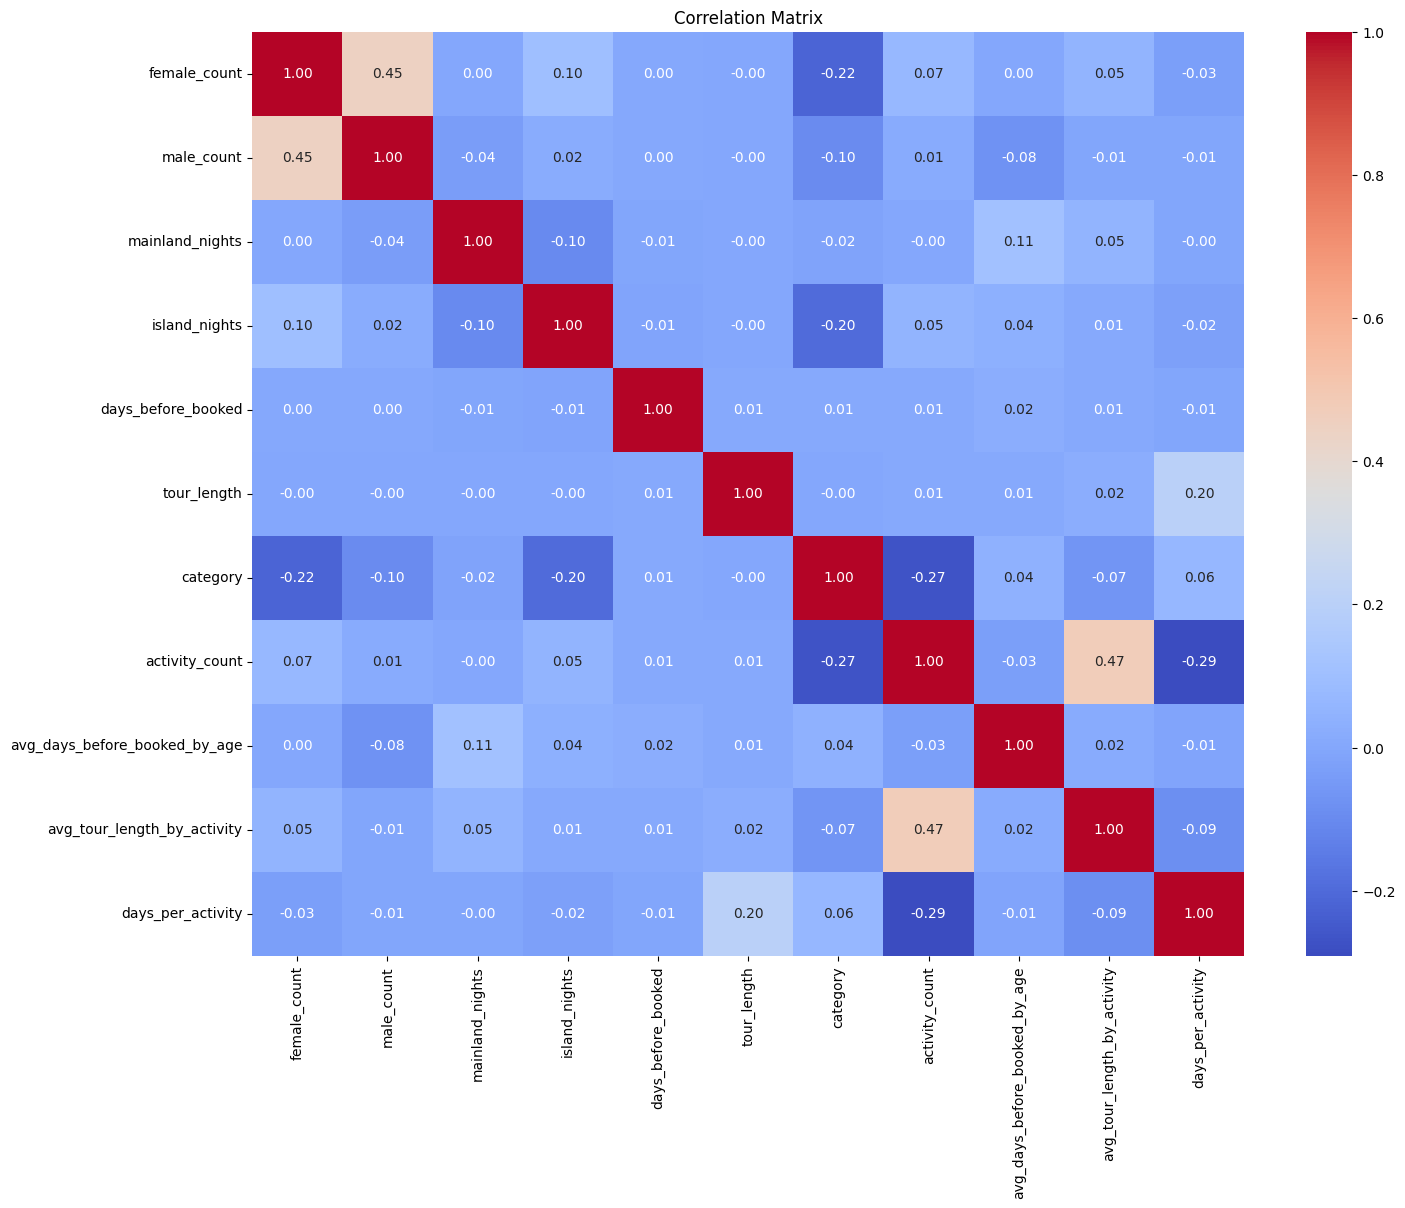

In [36]:
# # Add PCA for dimensionality reduction
# pca = TruncatedSVD(n_components=5)  # Reduce to 5 components

# # SMOTE for balancing the dataset
# pipeline = ImbPipeline(steps=[
#     ('preprocessor', preprocessor),
#     ('pca', pca),
#     ('smote', SMOTE(random_state=42, sampling_strategy='auto')),
#     ('model', xgb_model)
# ])

import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_data = train_data.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Plot heatmap for better visualization
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

<p style="font-size: 26px;"> TRAINING</p>

In [37]:
from sklearn.model_selection import train_test_split

In [38]:

X = train_data.drop('category', axis=1)
y = train_data['category']

# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
for col in categorical_columns:
    X_train[col] = X_train[col].astype('category')
    X_val[col] = X_val[col].astype('category')

<p style="font-size: 20px;"> XGBoost Classifier</p>

In [40]:
# Using the XGBoost Classifier
from xgboost import XGBClassifier

xgb_model = XGBClassifier(
    n_estimators=200,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.85,
    colsample_bytree=0.8,
    random_state=42,
    use_label_encoder=False,
    eval_metric='mlogloss'
)

In [41]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score

# Defining the parameter grid
param_grid_xgb = {
    'model__n_estimators': [100, 150, 200],
    'model__max_depth': [4, 6, 8],
    'model__learning_rate': [0.01, 0.05, 0.1],
    'model__subsample': [0.75, 0.85],
    'model__colsample_bytree': [0.8, 0.9],
}

# Initializing the XGBClassifier
xgb1_model = XGBClassifier(
    random_state=42,
    enable_categorical=True,
    use_label_encoder=False,
    eval_metric='mlogloss'  # Avoid warnings
)

pipeline_xgb1 = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42, sampling_strategy='auto')),
    ('model', xgb1_model)
])


# Using GridSearchCV to find the best parameters
grid_search_xgb = GridSearchCV(
    estimator=pipeline_xgb1,
    param_grid=param_grid_xgb,
    scoring='accuracy',
    cv=5,
    verbose=2,
    n_jobs=-1

)

# Fit the GridSearchCV on the training data
grid_search_xgb.fit(X_train, y_train)

print(f"Best Parameters for XGBClassifier: {grid_search_xgb.best_params_}")
print(f"Best Cross-Validation Accuracy: {grid_search_xgb.best_score_:.4f}")

# Use the best model for evaluation
gs_xgb_model = grid_search_xgb.best_estimator_




Fitting 5 folds for each of 108 candidates, totalling 540 fits


KeyboardInterrupt: 

<p style="font-size: 20px;"> Gradient Boosting Classifier</p>

In [42]:
# Using the Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(
    n_estimators=200,
    max_depth=6,
    learning_rate=0.05,
    random_state=42
)

<p style="font-size: 20px;"> Random Forest Classifier</p>

In [43]:
# Using the Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=6,
    random_state=42

)

In [45]:
# Defining the parameter grid for RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
param_grid = {
    'model__n_estimators': [100, 150],
    'model__max_depth': [4, 6, None],
    'model__min_samples_split': [2, 5],
    'model__min_samples_leaf': [1, 2],
    'model__max_features': ['sqrt', 'log2', None]
}

# Initializing the RandomForestClassifier
rf1_model = RandomForestClassifier(random_state=42)

# Creating the pipeline with preprocessing, SMOTE, and the model
pipeline_rf = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42, sampling_strategy='auto')),
    ('model', rf1_model)
])

# Using GridSearchCV to find the best parameters
grid_search = GridSearchCV(
    estimator=pipeline_rf,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    verbose=2,
    n_jobs=-1
)

# Fit the GridSearchCV to the training data
grid_search.fit(X_train, y_train)

print()
print(f"Best Parameters for RandomForest classifier: {grid_search.best_params_}")

# Use the best model for the pipeline
gs_rf_model = grid_search.best_estimator_




Fitting 5 folds for each of 72 candidates, totalling 360 fits


KeyboardInterrupt: 

In [46]:
print()
print(f"Best Parameters for RandomForest classifier:")
print(grid_search.best_params_)


Best Parameters for RandomForest classifier:


AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [48]:
from sklearn.ensemble import RandomForestClassifier


rf1_model = RandomForestClassifier(
    n_estimators=150,
    max_depth=None,
    random_state=42,
    max_features='sqrt',
    min_samples_leaf=1,
    min_samples_split=5
)


<p style="font-size: 20px;"> Decision Tree Classifier</p>

In [49]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(
    max_depth=6,
    random_state=42
)

<p style="font-size: 20px;"> Ada Boost Classifier</p>

In [50]:
from sklearn.ensemble import AdaBoostClassifier

# Defining the AdaBoost model
ada_model = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=3),
    n_estimators=200,
    learning_rate=1.0,
    random_state=42
)

<p style="font-size: 20px;"> K-Neighbors Classifier</p>

In [51]:
from sklearn.neighbors import KNeighborsClassifier

# Defining the KNN model
knn_model = KNeighborsClassifier(
    n_neighbors=5,
    weights='uniform',
    algorithm='auto',
    p=2,
)


Here we define a pipeline (pipeline_gs_xgb) for a machine learning model, specifically for an XGBoost classifier, incorporating multiple preprocessing and transformation steps. First, it applies the preprocessor to transform the input data, which includes scaling numerical features and encoding categorical features. Next, it applies the Synthetic Minority Over-sampling Technique (SMOTE) using the smote step to address class imbalance by generating synthetic examples for the minority class. Finally, the pipeline includes the gs_xgb_model, which represents an optimized XGBoost model that is trained on the transformed and balanced dataset. This same approach is applied to other models such as Random Forest (rf), Decision Tree (dt), Gradient Boosting Classifier, AdaBoost, XGBoost, and K-Nearest Neighbors (KNN) by defining similar pipelines for each.

In [52]:
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE

In [53]:
pipeline_xgb = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42, sampling_strategy='auto')),
    ('model', xgb_model)
])

In [54]:
pipeline_gs_xgb = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42, sampling_strategy='auto')),
    ('model', gs_xgb_model)
])

NameError: name 'gs_xgb_model' is not defined

In [55]:
pipeline_gb = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42, sampling_strategy='auto')),
    ('model', gb_model)
])

In [56]:
pipeline_rf = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42, sampling_strategy='auto')),
    ('model', rf_model)
])


In [57]:
rf1_model = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42, sampling_strategy='auto')),
    ('model', gs_rf_model)
])

NameError: name 'gs_rf_model' is not defined

In [58]:
pipeline_dt = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42, sampling_strategy='auto')),
    ('model', dt_model)
])

In [59]:
pipeline_ada = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42, sampling_strategy='auto')),
    ('model', ada_model)
])

In [60]:
pipeline_knn = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42, sampling_strategy='auto')),
    ('model', knn_model)
])

In [61]:
pipeline_rf1 = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42, sampling_strategy='auto')),
    ('model', rf1_model)
])

In [62]:
pipeline_rf1.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['female_count', 'male_count',
                                                   'mainland_nights',
                                                   'island_nights',
                                                   'days_before_booked',
                                                   'tour_length',
                                                   'activity_count',
                                                   'avg_days_before_booked_by_age',
                                                   'days_per_activity']),
                                                 ('cat',
                                                  Pipeline(steps=[('object_to_category',
                                                                   ObjectToCategoryTransformer()),
                                                                  ('onehot',
                                                                   OneHotE...
                                                   'key_activity',
                                                   'trip_purpose',
                                                   'first_time_visitor',
                                                   'tour_arrangement',
                                                   'transport_package_international',
                                                   'package_accomodation',
                                                   'food_package',
                                                   'transport_package_mx',
                                                   'sightseeing_package',
                                                   'guided_tour_package',
                                                   'insurance_package'])])),
                ('smote', SMOTE(random_state=42)),
                ('model',
                 RandomForestClassifier(min_samples_split=5, n_estimators=150,
                                        random_state=42))])

In [63]:
pipeline_xgb.fit(X_train, y_train)
# pipeline_gs_xgb.fit(X_train, y_train)
pipeline_gb.fit(X_train, y_train)
pipeline_rf.fit(X_train, y_train)

# pipeline_gs_rf.fit(X_train, y_train)
pipeline_dt.fit(X_train, y_train)
pipeline_ada.fit(X_train, y_train)
pipeline_knn.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [10:32:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['female_count', 'male_count',
                                                   'mainland_nights',
                                                   'island_nights',
                                                   'days_before_booked',
                                                   'tour_length',
                                                   'activity_count',
                                                   'avg_days_before_booked_by_age',
                                                   'days_per_activity']),
                                                 ('cat',
                                                  Pipeline(steps=[('object_to_category',
                                                                   ObjectToCategoryTransformer()),
                                                                  ('onehot',
                                                                   OneHotE...
                                                  ['visitor_nation',
                                                   'age_bracket',
                                                   'travelling_with',
                                                   'key_activity',
                                                   'trip_purpose',
                                                   'first_time_visitor',
                                                   'tour_arrangement',
                                                   'transport_package_international',
                                                   'package_accomodation',
                                                   'food_package',
                                                   'transport_package_mx',
                                                   'sightseeing_package',
                                                   'guided_tour_package',
                                                   'insurance_package'])])),
                ('smote', SMOTE(random_state=42)),
                ('model', KNeighborsClassifier())])

In [64]:
y_val_pred_xgb = pipeline_xgb.predict(X_val)
# y_val_pred_gs_xgb = pipeline_gs_xgb.predict(X_val)
y_val_pred_gb = pipeline_gb.predict(X_val)
y_val_pred_rf = pipeline_rf.predict(X_val)
# y_val_pred_gs_rf = pipeline_gs_rf.predict(X_val)
y_val_pred_dt = pipeline_dt.predict(X_val)
y_val_pred_ada = pipeline_ada.predict(X_val)
y_val_pred_knn = pipeline_knn.predict(X_val)
y_val_pred_rf1 = pipeline_xgb.predict(X_val)

Finding the Accuracy,F1 Score and ROC-AUC Score for each of these models

In [65]:
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt



In [66]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

# # Evaluate on the validation set

# val_accuracy = accuracy_score(y_val, y_val_pred_rf)
# val_f1 = f1_score(y_val, y_val_pred_ada, average='weighted')

# print(f"Validation Accuracy: {val_accuracy:.4f}")
# print(f"Validation F1 Score: {val_f1:.4f}")


In [67]:
val_accuracy = accuracy_score(y_val, y_val_pred_xgb)
val_f1 = f1_score(y_val, y_val_pred_xgb, average='weighted')
val_roc_auc = roc_auc_score(y_val, pipeline_xgb.predict_proba(X_val), multi_class='ovr')

print("For xg boost : ")
print(f"Validation Accuracy: {val_accuracy:.4f}")
print(f"Validation F1 Score: {val_f1:.4f}")
print(f"Validation ROC-AUC Score: {val_roc_auc:.4f}")

For xg boost : 
Validation Accuracy: 0.7524
Validation F1 Score: 0.7496
Validation ROC-AUC Score: 0.8785


In [68]:
# val_accuracy = accuracy_score(y_val, y_val_pred_gs_xgb)
# val_f1 = f1_score(y_val, y_val_pred_gs_xgb, average='weighted')
# val_roc_auc = roc_auc_score(y_val, pipeline_gs_xgb.predict_proba(X_val), multi_class='ovr')

# print("For gs + xg boost : ")
# print(f"Validation Accuracy: {val_accuracy:.4f}")
# print(f"Validation F1 Score: {val_f1:.4f}")
# print(f"Validation ROC-AUC Score: {val_roc_auc:.4f}")

In [69]:
val_accuracy = accuracy_score(y_val, y_val_pred_gb)
val_f1 = f1_score(y_val, y_val_pred_gb, average='weighted')
val_roc_auc = roc_auc_score(y_val, pipeline_gb.predict_proba(X_val), multi_class='ovr')

print("For gradient boost : ")
print(f"Validation Accuracy: {val_accuracy:.4f}")
print(f"Validation F1 Score: {val_f1:.4f}")
print(f"Validation ROC-AUC Score: {val_roc_auc:.4f}")

For gradient boost : 
Validation Accuracy: 0.7488
Validation F1 Score: 0.7458
Validation ROC-AUC Score: 0.8782


In [70]:
val_accuracy = accuracy_score(y_val, y_val_pred_rf)
val_f1 = f1_score(y_val, y_val_pred_rf, average='weighted')
val_roc_auc = roc_auc_score(y_val, pipeline_rf.predict_proba(X_val), multi_class='ovr')

print("For random forest : ")
print(f"Validation Accuracy: {val_accuracy:.4f}")
print(f"Validation F1 Score: {val_f1:.4f}")
print(f"Validation ROC-AUC Score: {val_roc_auc:.4f}")

For random forest : 
Validation Accuracy: 0.6597
Validation F1 Score: 0.6603
Validation ROC-AUC Score: 0.8569


In [71]:
# val_accuracy = accuracy_score(y_val, y_val_pred_gs_rf)
# val_f1 = f1_score(y_val, y_val_pred_gs_rf, average='weighted')
# val_roc_auc = roc_auc_score(y_val, pipeline_gs_rf.predict_proba(X_val), multi_class='ovr')

# print("For random forest + gs : ")
# print(f"Validation Accuracy: {val_accuracy:.4f}")
# print(f"Validation F1 Score: {val_f1:.4f}")
# print(f"Validation ROC-AUC Score: {val_roc_auc:.4f}")

In [72]:
val_accuracy = accuracy_score(y_val, y_val_pred_rf1)
val_f1 = f1_score(y_val, y_val_pred_rf1, average='weighted')
val_roc_auc = roc_auc_score(y_val, pipeline_rf1.predict_proba(X_val), multi_class='ovr')

print("For random forest1 : ")
print(f"Validation Accuracy: {val_accuracy:.4f}")
print(f"Validation F1 Score: {val_f1:.4f}")
print(f"Validation ROC-AUC Score: {val_roc_auc:.4f}")

For random forest1 : 
Validation Accuracy: 0.7524
Validation F1 Score: 0.7496
Validation ROC-AUC Score: 0.8653


In [73]:
val_accuracy = accuracy_score(y_val, y_val_pred_dt)
val_f1 = f1_score(y_val, y_val_pred_dt, average='weighted')
val_roc_auc = roc_auc_score(y_val, pipeline_dt.predict_proba(X_val), multi_class='ovr')

print("For decision tree : ")
print(f"Validation Accuracy: {val_accuracy:.4f}")
print(f"Validation F1 Score: {val_f1:.4f}")
print(f"Validation ROC-AUC Score: {val_roc_auc:.4f}")

For decision tree : 
Validation Accuracy: 0.7040
Validation F1 Score: 0.7035
Validation ROC-AUC Score: 0.8426


In [74]:
val_accuracy = accuracy_score(y_val, y_val_pred_ada)
val_f1 = f1_score(y_val, y_val_pred_ada, average='weighted')
val_roc_auc = roc_auc_score(y_val, pipeline_ada.predict_proba(X_val), multi_class='ovr')

print("For ada boost : ")
print(f"Validation Accuracy: {val_accuracy:.4f}")
print(f"Validation F1 Score: {val_f1:.4f}")
print(f"Validation ROC-AUC Score: {val_roc_auc:.4f}")

For ada boost : 
Validation Accuracy: 0.6981
Validation F1 Score: 0.6960
Validation ROC-AUC Score: 0.7193


In [75]:
val_accuracy = accuracy_score(y_val, y_val_pred_knn)
val_f1 = f1_score(y_val, y_val_pred_knn, average='weighted')
val_roc_auc = roc_auc_score(y_val, pipeline_knn.predict_proba(X_val), multi_class='ovr')

print("For kth nearest neighbours : ")
print(f"Validation Accuracy: {val_accuracy:.4f}")
print(f"Validation F1 Score: {val_f1:.4f}")
print(f"Validation ROC-AUC Score: {val_roc_auc:.4f}")

For kth nearest neighbours : 
Validation Accuracy: 0.6204
Validation F1 Score: 0.6360
Validation ROC-AUC Score: 0.7739


In [76]:
# from sklearn.decomposition import PCA
# from sklearn.preprocessing import StandardScaler
# import pandas as pd

# # Assume train_data is the DataFrame you are working with
# # Select numerical columns (adjust based on your dataset)
# numerical_columns = ['female_count', 'male_count', 'days_before_booked', 'tour_length',
#                      'activity_count', 'avg_days_before_booked_by_age', 'days_per_activity']

# # Separate features and target (Assume 'category' is the target column)
# X = train_data[numerical_columns]
# y = train_data['category']

# # Step 1: Standardize the numerical features
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# # Step 2: Apply PCA (Let's keep 2 principal components for visualization purposes)
# pca = PCA(n_components=2)  # You can change the number of components as needed
# X_pca = pca.fit_transform(X_scaled)

# # Create a DataFrame with the principal components
# pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])

# # Step 3: Check the explained variance ratio
# print(f"Explained variance ratio for each component: {pca.explained_variance_ratio_}")
# print(f"Total explained variance: {sum(pca.explained_variance_ratio_):.4f}")

# # Step 4: Visualize the result (if you have 2 components)
# import matplotlib.pyplot as plt

# plt.figure(figsize=(8, 6))
# plt.scatter(pca_df['PC1'], pca_df['PC2'], c=y, cmap='viridis', edgecolors='k', alpha=0.7)
# plt.colorbar(label='Category')
# plt.title('PCA - 2 Components')
# plt.xlabel('Principal Component 1')
# plt.ylabel('Principal Component 2')
# plt.show()

# # Optionally, if you want to keep more components:
# # pca = PCA(n_components=0.95)  # This will retain components that explain 95% variance
# # X_pca = pca.fit_transform(X_scaled)


<p style="font-size: 26px;">TESTING</p>

In [77]:
test_data = pd.read_csv('test.csv')


<p style="font-size: 16px;">PREPROCESSING ON TESTING DATA</p>

In [78]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5852 entries, 0 to 5851
Data columns (total 24 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   trip_ID                          5852 non-null   object 
 1   visitor_nation                   5726 non-null   object 
 2   age_bracket                      5852 non-null   object 
 3   travelling_with                  5514 non-null   object 
 4   female_count                     5852 non-null   float64
 5   male_count                       5850 non-null   float64
 6   key_activity                     5787 non-null   object 
 7   trip_purpose                     5852 non-null   object 
 8   first_time_visitor               5813 non-null   object 
 9   mainland_nights                  5852 non-null   int64  
 10  island_nights                    5852 non-null   int64  
 11  tour_arrangement                 5852 non-null   object 
 12  transport_package_in

In [79]:
test_data.shape

(5852, 24)

In [80]:
test_data.drop_duplicates(inplace = True)
test_data.shape

(5852, 24)

In [81]:
test_data.drop(columns=columns_to_drop, inplace=True)

In [82]:
null_counts = test_data.isnull().sum()
print(null_counts)

visitor_nation                     126
age_bracket                          0
travelling_with                    338
female_count                         0
male_count                           2
key_activity                        65
trip_purpose                         0
first_time_visitor                  39
mainland_nights                      0
island_nights                        0
tour_arrangement                     0
transport_package_international     57
package_accomodation                62
food_package                        78
transport_package_mx                 0
sightseeing_package                  0
guided_tour_package                  0
insurance_package                  107
days_before_booked                 667
tour_length                        153
dtype: int64


In [83]:
for column in categorical_columns_raw:
    mode_train = test_data[column].mode()[0]
    test_data[column].fillna(mode_train, inplace=True)

<ipython-input-83-998b6386ce7e>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_data[column].fillna(mode_train, inplace=True)


In [84]:
test_data['days_before_booked'] = test_data['days_before_booked'].apply(convert_ranges)
test_data['tour_length'] = test_data['tour_length'].apply(convert_ranges)

In [85]:
for column in numerical_columns_raw:
    median_train = test_data[column].median()
    test_data[column].fillna(median_train, inplace=True)

<ipython-input-85-4dc91120e813>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_data[column].fillna(median_train, inplace=True)


In [86]:
test_data = feature_engineering(test_data)

<p style="font-size: 26px;">MAKING PREDICTIONS</p>

In [87]:
pipeline_xgb.fit(X_train, y_train)
# pipeline_gs_xgb.fit(X_train, y_train)
pipeline_gb.fit(X_train, y_train)
pipeline_rf.fit(X_train, y_train)
# pipeline_gs_rf.fit(X_train, y_train)
pipeline_dt.fit(X_train, y_train)
pipeline_ada.fit(X_train, y_train)
pipeline_knn.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [10:38:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['female_count', 'male_count',
                                                   'mainland_nights',
                                                   'island_nights',
                                                   'days_before_booked',
                                                   'tour_length',
                                                   'activity_count',
                                                   'avg_days_before_booked_by_age',
                                                   'days_per_activity']),
                                                 ('cat',
                                                  Pipeline(steps=[('object_to_category',
                                                                   ObjectToCategoryTransformer()),
                                                                  ('onehot',
                                                                   OneHotE...
                                                  ['visitor_nation',
                                                   'age_bracket',
                                                   'travelling_with',
                                                   'key_activity',
                                                   'trip_purpose',
                                                   'first_time_visitor',
                                                   'tour_arrangement',
                                                   'transport_package_international',
                                                   'package_accomodation',
                                                   'food_package',
                                                   'transport_package_mx',
                                                   'sightseeing_package',
                                                   'guided_tour_package',
                                                   'insurance_package'])])),
                ('smote', SMOTE(random_state=42)),
                ('model', KNeighborsClassifier())])

In [88]:
X_test = test_data
y_test_xg_predictions = pipeline_xgb.predict(X_test)
# y_test_gs_xg_predictions = pipeline_gs_xgb.predict(X_test)
y_test_gb_predictions = pipeline_gb.predict(X_test)
y_test_rf_predictions = pipeline_rf.predict(X_test)
# y_test_gs_rf_predictions = pipeline_gs_rf.predict(X_test)
y_test_dt_predictions = pipeline_dt.predict(X_test)
y_test_ada_predictions = pipeline_ada.predict(X_test)
y_test_knn_predictions = pipeline_knn.predict(X_test)
y_test_rf1_predictions = pipeline_rf1.predict(X_test)

In [89]:
test_ids = pd.read_csv('test.csv')['trip_ID']

# Create a submission DataFrame
submission_xg = pd.DataFrame({
    'trip_ID': test_ids,
    'category': y_test_xg_predictions
})

In [90]:
# submission_gs_xg = pd.DataFrame({
#     'trip_ID': test_ids,
#     'category': y_test_gs_xg_predictions
# })
submission_gb = pd.DataFrame({
    'trip_ID': test_ids,
    'category': y_test_gb_predictions
})
submission_rf = pd.DataFrame({
    'trip_ID': test_ids,
    'category': y_test_rf_predictions
})
# submission_gs_rf = pd.DataFrame({
#     'trip_ID': test_ids,
#     'category': y_test_gs_rf_predictions
# })
submission_dt = pd.DataFrame({
    'trip_ID': test_ids,
    'category': y_test_dt_predictions
})
submission_ada = pd.DataFrame({
    'trip_ID': test_ids,
    'category': y_test_ada_predictions
})
submission_knn = pd.DataFrame({
    'trip_ID': test_ids,
    'category': y_test_knn_predictions
})
submission_rf1 = pd.DataFrame({
    'trip_ID': test_ids,
    'category': y_test_rf1_predictions
})

In [91]:
''' Saving predicitons in a csv file '''

submission_xg.to_csv('submission_XGBoost_final1.csv', index=False)
print("Submission file created successfully.")

Submission file created successfully.


In [92]:
submission_gb.to_csv('submission_gb.csv', index=False)
print("Submission file created successfully.")

submission_rf.to_csv('submission_rf.csv', index=False)
print("Submission file created successfully.")

submission_dt.to_csv('submission_dt.csv', index=False)
print("Submission file created successfully.")

submission_ada.to_csv('submission_ada.csv', index=False)
print("Submission file created successfully.")

submission_knn.to_csv('submission_knn.csv', index=False)
print("Submission file created successfully.")

submission_rf1.to_csv('submission_rf1.csv', index=False)
print("Submission file created successfully.")

Submission file created successfully.
Submission file created successfully.
Submission file created successfully.
Submission file created successfully.
Submission file created successfully.
Submission file created successfully.


# PART - **2**

Here we are using the models **SVM**, **Logistic Regression**, and **Neural Networks** on the same pre-processed data.

- **SVM**: A supervised machine learning algorithm used for classification and regression tasks. It works by finding the best hyperplane (decision boundary) that separates data into different classes.
- **Neural Networks**: A feed-forward neural network is implemented with multiple hidden layers, using backpropagation for training.
- **Logistic Regression**: A simple linear classifier is employed, tuned using GridSearchCV to optimize its regularization parameters.


**Logistic Regression**

In [94]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
import pandas as pd

# defining the parameter grid
param_grid_lr = {
    'model__C': [0.01, 0.1, 1, 10],
    'model__solver': ['liblinear'],
    'model__penalty': ['l1', 'l2'],
}

# initializing the logistic regression model
lr_model = LogisticRegression(random_state=42, max_iter=1000)

# creating an imbalanced learning pipeline with preprocessing, SMOTE for oversampling, and the Logistic Regression model.
pipeline_lr = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42, sampling_strategy='auto')),
    ('model', lr_model)
])

# using GridSearchCV to tune hyperparameters and find the best model.
grid_search_lr = GridSearchCV(
    estimator=pipeline_lr,
    param_grid=param_grid_lr,
    scoring='accuracy',
    cv=5,
    verbose=2,
    n_jobs=-1
)

# grid search on the training data to find the best hyperparameters.
grid_search_lr.fit(X_train, y_train)



Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['female_count',
                                                                          'male_count',
                                                                          'mainland_nights',
                                                                          'island_nights',
                                                                          'days_before_booked',
                                                                          'tour_length',
                                                                          'activity_count',
                                                                          'avg_days_before_booked_by_age',
                                                                          'days_per_activity']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('object_to_category',
                                                                                          ObjectToCategoryTran...
                                                                          'package_accomodation',
                                                                          'food_package',
                                                                          'transport_package_mx',
                                                                          'sightseeing_package',
                                                                          'guided_tour_package',
                                                                          'insurance_package'])])),
                                       ('smote', SMOTE(random_state=42)),
                                       ('model',
                                        LogisticRegression(max_iter=1000,
                                                           random_state=42))]),
             n_jobs=-1,
             param_grid={'model__C': [0.01, 0.1, 1, 10],
                         'model__penalty': ['l1', 'l2'],
                         'model__solver': ['liblinear']},
             scoring='accuracy', verbose=2)

In [95]:
# extracting the best parameters and cross-validation score.
print(f"Best Parameters for LogisticRegression: {grid_search_lr.best_params_}")
print(f"Best Cross-Validation Accuracy: {grid_search_lr.best_score_:.4f}")

# the best model from GridSearchCV
gs_lr_model = grid_search_lr.best_estimator_

Best Parameters for LogisticRegression: {'model__C': 0.1, 'model__penalty': 'l1', 'model__solver': 'liblinear'}
Best Cross-Validation Accuracy: 0.7308


In [96]:
# making predictions on the validation set and calculate metrics.
y_val_pred_lr = gs_lr_model.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred_lr)
val_f1 = f1_score(y_val, y_val_pred_lr, average='weighted')
val_roc_auc = roc_auc_score(y_val, gs_lr_model.predict_proba(X_val), multi_class='ovr')

print(f"Validation Accuracy: {val_accuracy:.4f}")
print(f"Validation F1 Score: {val_f1:.4f}")
print(f"Validation ROC AUC: {val_roc_auc:.4f}")

Validation Accuracy: 0.7072
Validation F1 Score: 0.7082
Validation ROC AUC: 0.8619


In [97]:
# applying the best model to the test data for predictions.
test_data = feature_engineering(test_data)
gs_lr_model.fit(X_train, y_train)
X_test = test_data
y_test_lr_predictions = gs_lr_model.predict(X_test)

In [98]:
# preparing the submission DataFrame and export to a CSV file.
submission_lr = pd.DataFrame({
    'trip_ID': test_ids,
    'category': y_test_lr_predictions
})
submission_lr.to_csv('submission_lr.csv', index=False)

**Support Vector Machine**

In [99]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, f1_score

# here we are selecting numeric and categorical features from the dataset
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# here we are defining a pipeline for numeric features that imputes missing values using the median and scales them
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

# here we are defining a pipeline for categorical features that imputes missing values with the most frequent value and applies one-hot encoding
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# here we are combining the numeric and categorical transformers using a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# here we are creating an imbalanced pipeline that includes the preprocessor, SMOTE for oversampling, and an SVM model with specified hyperparameters
svm_pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('model', SVC(probability=True, C=0.16, kernel='rbf', gamma='scale'))
])

# here we are fitting the SVM pipeline on the training data
svm_pipeline.fit(X_train, y_train)

# here we are predicting the validation labels using the fitted SVM pipeline
svm_y_pred = svm_pipeline.predict(X_val)

# here we are calculating and printing the accuracy and f1 score for the SVM model on the validation set
print(f"SVM - Accuracy: {accuracy_score(y_val, svm_y_pred)}")
print(f"SVM - F1 Score: {f1_score(y_val, svm_y_pred, average='weighted')}")


SVM - Accuracy: 0.6933438985736925
SVM - F1 Score: 0.6925371591276853


In [100]:
print(f"SVM - Accuracy: {accuracy_score(y_val, svm_y_pred)}")
print(f"SVM - F1 Score: {f1_score(y_val, svm_y_pred, average='weighted')}")

SVM - Accuracy: 0.6933438985736925
SVM - F1 Score: 0.6925371591276853


In [101]:
# applying the model to the test data for predictions.
X_test = test_data
y_test_SVM_predictions = svm_pipeline.predict(X_test)

In [102]:
test_ids = pd.read_csv('test.csv')['trip_ID']

submission_SVM = pd.DataFrame({
    'trip_ID': test_ids,
    'category': y_test_SVM_predictions
})

In [103]:
''' Saving predicitons in a csv file '''

submission_SVM.to_csv('submission_SVM.csv', index=False)
print("Submission file created successfully.")

Submission file created successfully.


**Neural** **Network**

In [119]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import tensorflow as tf
from tensorflow.keras import layers, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, f1_score
import random
from imblearn.over_sampling import SMOTE

random.seed(42)  # here we set the seed for random number generation to ensure consistent results
np.random.seed(42)  # setting the numpy random seed for reproducibility
tf.random.set_seed(42)  # setting the tensorflow random seed to make results reproducible

numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[  # here we define a pipeline for scaling numeric features
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[  # here we define a pipeline for encoding categorical features
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

total_preprocessor = ColumnTransformer(  # combining the numerical and categorical transformers
    transformers=[
        ('num', numeric_transformer, numeric_features),  # applying numeric transformer to numeric features
        ('cat', categorical_transformer, categorical_features)  # applying categorical transformer to categorical features
    ])

X_processed = total_preprocessor.fit_transform(X)  # applying the column transformer to the features

if not isinstance(X_processed, np.ndarray):  # checking if the result is not already a dense array
    X_processed = X_processed.toarray()  # converting to dense format if it's a sparse matrix



X_train, X_val, y_train, y_val = train_test_split(X_processed, y, test_size=0.2, random_state=42)  # splitting the data for training and validation

smote = SMOTE(random_state=42, sampling_strategy='auto')  # initializing SMOTE for handling class imbalance
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)  # applying SMOTE to oversample the minority class

model = Sequential([  # initializing the neural network model
    layers.Input(shape=(X_train_smote.shape[1],)),  # input layer
    layers.Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),  # first hidden layer with L2 regularization
    layers.Dropout(0.3),  # dropout layer
    layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),  # second hidden layer
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),  # third hidden layer
    layers.Dense(len(np.unique(y_train_smote)), activation='softmax')  # output layer with softmax activation for multi-class classification
])

optimizer = Adam(learning_rate=0.001)  # using Adam optimizer with a learning rate of 0.001

model.compile(optimizer=optimizer,  # compiling the model with the specified optimizer
              loss='sparse_categorical_crossentropy',  # using sparse categorical crossentropy loss function
              metrics=['accuracy'])  # tracking accuracy during training

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)  # early stopping to prevent overfitting

model.fit(X_train_smote, y_train_smote, epochs=50, batch_size=32, validation_split=0.2, verbose=1, callbacks=[early_stopping])  # training the model

NN_y_pred_prob = model.predict(X_val)  # predicting probabilities for the validation set
NN_y_pred = np.argmax(NN_y_pred_prob, axis=1)  # converting probabilities to class predictions

print(f"Neural Network - Accuracy: {accuracy_score(y_val, NN_y_pred)}")  # calculating accuracy
print(f"Neural Network - F1 Score: {f1_score(y_val, NN_y_pred, average='weighted')}")  # calculating weighted F1 score


Epoch 1/50
381/381 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.6592 - loss: 2.6777 - val_accuracy: 0.3999 - val_loss: 1.2554
Epoch 2/50
381/381 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7093 - loss: 0.8015 - val_accuracy: 0.4394 - val_loss: 1.1340
Epoch 3/50
381/381 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7108 - loss: 0.7442 - val_accuracy: 0.4640 - val_loss: 1.0902
Epoch 4/50
381/381 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7178 - loss: 0.7291 - val_accuracy: 0.5741 - val_loss: 0.9882
Epoch 5/50
381/381 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7144 - loss: 0.7267 - val_accuracy: 0.4331 - val_loss: 1.1219
Epoch 6/50
381/381 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7194 - loss: 0.7203 - val_accuracy: 0.4295 - val_loss: 1.1253
Epoch 7/50
381/381 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7195 - loss: 0.7126 - val_accuracy: 0.4788 - val_loss: 1.0538
Epoch 8/50
381/381 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7169 - loss: 0.7131 - val_accuracy: 0.

In [120]:
# applying the model to the test data for predictions.
X_test_processed = total_preprocessor.transform(X_test)

if not isinstance(X_test_processed, np.ndarray):
    X_test_processed = X_test_processed.toarray()

y_test_NN_predictions_prob = model.predict(X_test_processed)
y_test_NN_predictions = np.argmax(y_test_NN_predictions_prob, axis=1)

print(y_test_NN_predictions)

183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
[1 0 0 ... 0 2 1]


In [121]:
test_ids = pd.read_csv('test.csv')['trip_ID']

# creating a submission DataFrame
submission_NN = pd.DataFrame({
    'trip_ID': test_ids,
    'category': y_test_NN_predictions
})

In [122]:
''' Saving predicitons in a csv file '''

submission_NN.to_csv('submission_NN.csv', index=False)
print("Submission file created successfully.")

Submission file created successfully.
